In [78]:
using Revise
# using GLMakie
using CairoMakie
using DataFrames
using CSV
using Printf

In [87]:
target_dir = "/home/itsukimiyamoto/data/Cpp/CFD_cpp/debug/output"
files = readdir(target_dir)
n_x = length(files)
n_t = 0
t = []
r = Matrix{Float64}(undef, 0, 0)
u = Matrix{Float64}(undef, 0, 0)
p = Matrix{Float64}(undef, 0, 0)

for (i, file) in enumerate(files)
    path = joinpath(target_dir, file)
    i_x = parse(Int, split(split(file, "_")[2], ".")[1])
    df = CSV.File(path,
        header = true,
        types = Float64
    ) |> DataFrame

    if i == 1
        n_t = size(df, 1)
        t = df.t
        println("n_t = $n_t")
        r = zeros(n_x, n_t)
        u = zeros(n_x, n_t)
        p = zeros(n_x, n_t)
    end
    r[i_x, :] = df.r
    u[i_x, :] = df.u
    p[i_x, :] = df.p
end

# for (i, file) in enumerate(readdir(target_dir))
#     number = parse(Int, split(split(file, "_")[2], ".")[1])
#     path = joinpath(target_dir, file)
#     _df = CSV.File(path,
#         header = true,
#         types = Float64
#     ) |> DataFrame
#     if i == 1 ; t = _df.t ; end
# end

n_t = 8275


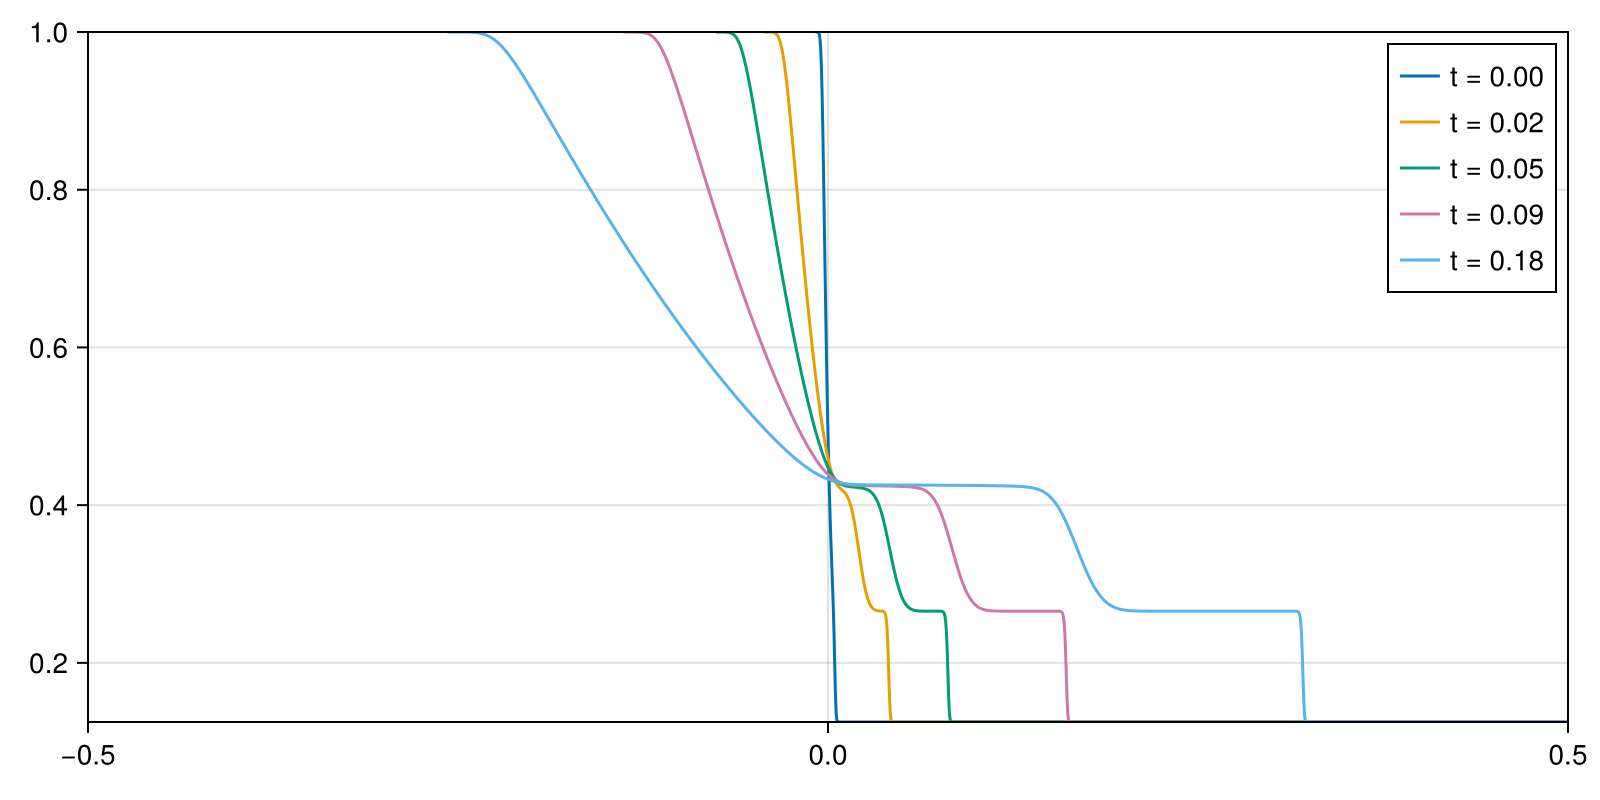

In [92]:
x = range(-0.5, 0.5, length = n_x)

fig = Figure(size = (800, 400))
ax = Axis(fig[1,1], limits = ((-0.5,0.5),(0.125,1)))
for i_t in [1,10,20,40,80]*20
    _t = t[i_t]
    lines!(ax, x, r[:,i_t], label = @sprintf("t = %.2f", _t))
end
axislegend(ax; position = :rt)
fig